<a href="https://colab.research.google.com/github/ParhamPishro/Solutions-of-FUM-Academic-Exercises/blob/main/Machine%20Learning/5_Convolutional_Neural_Network_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from keras.datasets import cifar10
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)
50000 train samples
10000 test samples


In [ ]:
# Normalize data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


In [ ]:
# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
# Define CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2, verbose=1)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 61s 95ms/step - accuracy: 0.2670 - loss: 1.9704 - val_accuracy: 0.5083 - val_loss: 1.3913
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 59s 94ms/step - accuracy: 0.4651 - loss: 1.4740 - val_accuracy: 0.5398 - val_loss: 1.3114
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 93ms/step - accuracy: 0.5145 - loss: 1.3484 - val_accuracy: 0.6029 - val_loss: 1.1522
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 91ms/step - accuracy: 0.5469 - loss: 1.2737 - val_accuracy: 0.6158 - val_loss: 1.1025
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 91ms/step - accuracy: 0.5742 - loss: 1.2080 - val_accuracy: 0.6350 - val_loss: 1.0580
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 57s 91ms/step - accuracy: 0.5860 - loss: 1.1633 - val_accuracy: 0.6419 - val_loss: 1.0262
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 91ms/step - accuracy: 0.6032 - loss: 1.1213 - val_accuracy: 0.6545 - val_loss: 0.9924
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 57s 91ms/step - accuracy: 0.6150 - loss: 1.0960 - 

In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("Test accuracy:", test_acc)

313/313 - 3s - 11ms/step - accuracy: 0.6741 - loss: 0.9509
Test accuracy: 0.6740999817848206


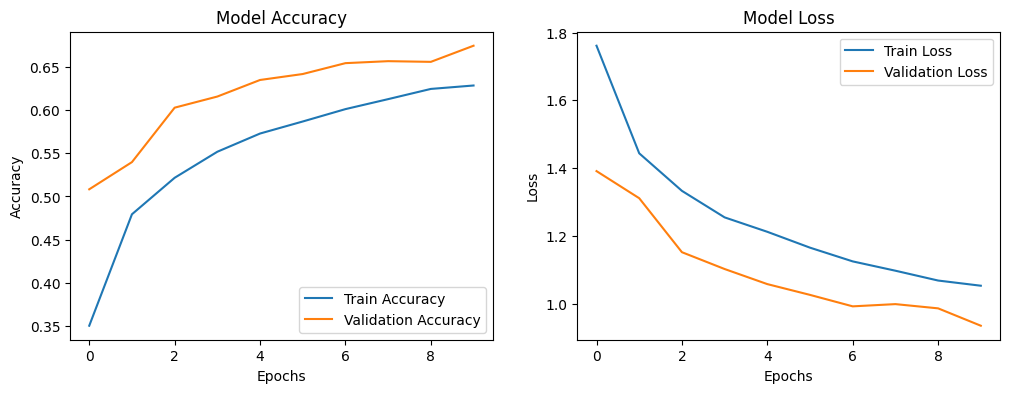

In [ ]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.show()


In [ ]:
# improve model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [ ]:
#Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)

In [ ]:
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    epochs=30, validation_data=(x_test, y_test), verbose=1)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 115s 146ms/step - accuracy: 0.1786 - loss: 2.1537 - val_accuracy: 0.3581 - val_loss: 1.7514
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 139s 141ms/step - accuracy: 0.3414 - loss: 1.7834 - val_accuracy: 0.4603 - val_loss: 1.4868
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 115s 147ms/step - accuracy: 0.4085 - loss: 1.6081 - val_accuracy: 0.5068 - val_loss: 1.3708
Epoch 4/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 112s 143ms/step - accuracy: 0.4516 - loss: 1.5199 - val_accuracy: 0.5471 - val_loss: 1.2818
Epoch 5/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 112s 143ms/step - accuracy: 0.4763 - loss: 1.4513 - val_accuracy: 0.5668 - val_loss: 1.2210
Epoch 6/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 111s 141ms/step - accuracy: 0.5037 - loss: 1.3831 - val_accuracy: 0.5844 - val_loss: 1.1708
Epoch 7/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 111s 141ms/step - accuracy: 0.5172 - loss: 1.3529 - val_accuracy: 0.5988 - val_loss: 1.1219
Epoch 8/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 142s 142ms/step - accuracy: 0.5350 - loss: 1.30

In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("Test accuracy:", test_acc)

313/313 - 5s - 15ms/step - accuracy: 0.7236 - loss: 0.8028
Test accuracy: 0.7235999703407288


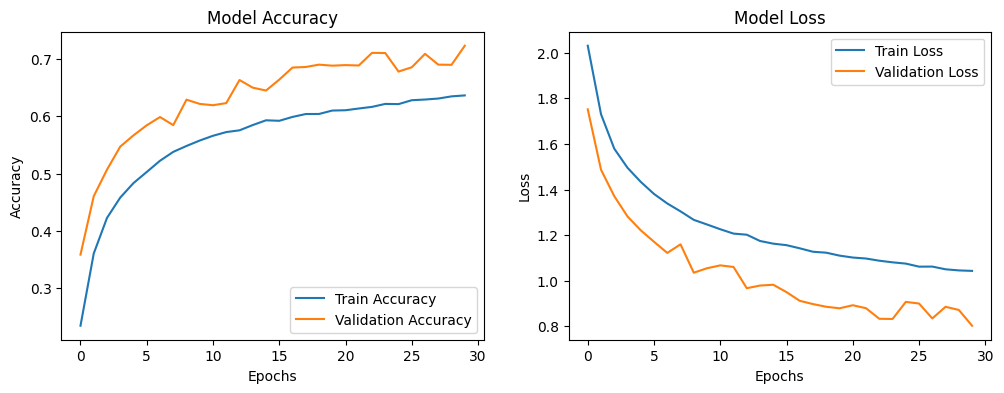

In [ ]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.show()